# <center> **Gauss Jordan vs Jacobi Iteration vs GEPP vs Gauss Seidel vs LU Decomposition** </center>

## Index of contents:

- [Importing Libraries](#Importing-Libraries)
- [Defining Functions](#Defining-Functions)
- [Defining Problem](#Defining-Problem)
- [Running Algorithm - Jacobi Iteration](#Running-Algorithm---Jacobi-Iteration)
- [Running Algorithm - Gauss Jordan](#Running-Algorithm---Gauss-Jordan)
- [Running Algorithm - GEPP](#Running-Algorithm---GEPP)
- [Running Algorithm - Gauss Seidel](#Running-Algorithm---Gauss-Seidel)
- [Running Algorithm - LU Decomposition](#Running-Algorithm---LU-Decomposition)


## Importing Libraries

In [186]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from GEPP import * # importing GEPP module

## Defining Functions

### diagonal_dom

In [187]:
def diagonal_dom(A):
    """
    Checks if the matrix is diagonal dominant.

    Parameters
    ----------
    A : numpy array
        The matrix to check.

    Returns
    -------
    bool
        True if the matrix is diagonal dominant, False otherwise.
    """
    n = A.shape[0]
    for i in range(n):
        sum = 0
        for j in range(n):
            if i != j:
                sum += abs(A[i, j])
        if abs(A[i, i]) <= sum:
            return False
    return True

### round_nearest

In [188]:
def round_nearest(value, nearest):
    """
    Rounds a given value to the nearest multiple of another value.

    Parameters
    ----------
    value : float
        The value to round.
    nearest : float
        The value to round to the nearest multiple of.

    Returns
    -------
    float
        The rounded value.
    """
    return np.ceil(value / nearest) * nearest

### gauss_jordan

In [189]:
def gauss_jordan(A, b):
    """
    Solves the linear system Ax=b using the Gauss-Jordan elimination method.

    Parameters
    ----------
    A : numpy array
        The matrix of the coefficients of the system.
    b : numpy array
        The vector of the right-hand side of the system.

    Returns
    -------
    x : numpy array
        The solution of the system.
    """
    
    x = np.linalg.inv(A) @ b
    return x

In [ ]:
def gauss_jordan(A):
    n = A.shape[0]

    for i in range(n):
        A[i] = A[i] / A[i][i]
        for j in range(n):
            if i != j:
                A[j] = A[j] - A[i] * A[j][i]

    return A[:,-1]


### jacobi_iteration

In [190]:
def jacobi_iteration(A, b, x = None, tol=1e-6, max_iter=100):
    """
    Jacobi iteration method for solving a system of linear equations.

    Parameters:
    A (numpy array): coefficient matrix
    b (numpy array): right hand side vector
    x (numpy array): initial guess, optional
    tol (float): error tolerance
    max_iter (int): maximum number of iterations

    Returns:
    x_final (list): list of solution vectors at each iteration
    error (list): list of errors at each iteration
    num_iter (int): number of iterations
    """
    if x is None:
        x = np.zeros_like(b)
    
    Diag = np.diag(A)
    R = A - np.diagflat(Diag)

    x_final = [x.tolist()]
    error = [np.inf]

    for iter in range(max_iter):
        x_new = (b - np.dot(R, x)) / Diag
        temp_err = abs(np.linalg.norm((x_new - x)/x_new, ord=np.inf))
        error.append(temp_err)
        x_final.append(x_new.tolist())
        if round_nearest(temp_err, tol) <= tol:
            return x_final, error, iter+1
        
        x = x_new
        
    return x_final, error, iter+1

### gauss_seidel

In [191]:
def gauss_seidel(A, b, x_init=None, tol=1e-10, max_iter=1000):
    
    """
    Gauss-Seidel iteration method for solving a system of linear equations.

    Parameters:
    A (numpy array): coefficient matrix
    b (numpy array): right hand side vector
    x (numpy array): initial guess, optional
    tol (float): error tolerance
    max_iter (int): maximum number of iterations

    Returns:
    x_final (list): list of solution vectors at each iteration
    error (list): list of errors at each iteration
    num_iter (int): number of iterations
    """
    n = len(b)
    

    if x_init is None:
        x = np.zeros(n)
    else:
        x = x_init.copy()
    
    x_final = [x.tolist()]
    error = [np.inf]
    
    for k in range(max_iter):
        x_new = x.copy()
        
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
            
        temp_err = abs(np.linalg.norm((x_new - x)/x_new, ord=np.inf))

        error.append(temp_err)
        x_final.append(x_new.tolist())
        if round_nearest(temp_err, tol) <= tol:
            return x_final, error, k + 1
        
        x = x_new
    
    return x, error, max_iter

## Defining Problem

$$3x_1 - 0.1x_2 - 0.2x_3 = 7.85$$ 
$$0.1x_1 + 7x_2 - 0.3x_3 = -19.3$$
$$0.3x_1 - 0.2x_2 + 10x_3 = 71.4 $$

Arranging the equations in matrix form:

$$A \cdot \vec{x} = \vec{b}$$

$$
\begin{bmatrix}
3 & -0.1 & -0.2 \\
0.1 & 7 & -0.3 \\
0.3 & -0.2 & 10
\end{bmatrix} \cdot
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
= 
\begin{bmatrix}
7.85 \\
-19.3 \\
71.4
\end{bmatrix}
$$

In [192]:
A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])

b = np.array([7.85, -19.3, 71.4])

print(f'Is A diagonally dominant? {diagonal_dom(A)}')

Is A diagonally dominant? True


## Running Algorithm - Jacobi Iteration

In [193]:
x_opt, error, iter = jacobi_iteration(A, b, x = None, tol = 0.01)

print(f'Optimal solution:\n{np.array(x_opt)}')
print(f'\nError: {error}')
print(f'\nNumber of iterations: {iter}')

Optimal solution:
[[ 0.          0.          0.        ]
 [ 2.61666667 -2.75714286  7.14      ]
 [ 3.0007619  -2.48852381  7.00635714]
 [ 3.00080635 -2.49973844  7.00020667]]

Error: [inf, 1.0, 0.12799923828868856, 0.0044863197251520754]

Number of iterations: 3


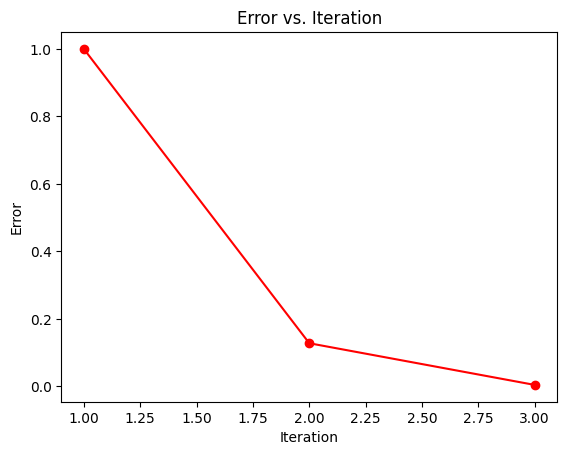

In [194]:
plt.plot(np.arange(0,iter+1), error, color="red", marker="o", )
plt.title('Error vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

## Running Algorithm - Gauss Jordan

In [195]:
A_copy = A.copy()
x_opt = gauss_jordan(A_copy, b)

print(f'Optimal solution:\n{x_opt}')

Optimal solution:
[ 3.  -2.5  7. ]


## Running Algorithm - GEPP

In [196]:
A_copy = A.copy()
b_copy = b.copy()
GaussElimPivot = GEPP(A_copy, b_copy)

print(f'Matrix A before elimination:\n{A}')
print(f'\nVectors b before elimination:\n{b}')
print(f'\nMatrix A after elimination:\n{GaussElimPivot.A}')
print(f'\nVectors b after elimination:\n{GaussElimPivot.b}')
print(f'\nOptimal solution:\n{GaussElimPivot.x}')

Matrix A before elimination:
[[ 3.  -0.1 -0.2]
 [ 0.1  7.  -0.3]
 [ 0.3 -0.2 10. ]]

Vectors b before elimination:
[  7.85 -19.3   71.4 ]

Matrix A after elimination:
[[ 3.         -0.1        -0.2       ]
 [ 0.          7.00333333 -0.29333333]
 [ 0.          0.         10.01204188]]

Vectors b after elimination:
[  7.85       -19.56166667  70.08429319]

Optimal solution:
[ 3.  -2.5  7. ]


## Running Algorithm - Gauss Seidel

In [197]:
A_copy = A.copy()
b_copy = b.copy()
x_opt, error, iter = gauss_seidel(A_copy, b_copy, x_init = None, tol = 0.001)

print(f'Optimal solution:\n{np.array(x_opt)}')
print(f'\nError: {error}')
print(f'\nNumber of iterations: {iter}')

Optimal solution:
[[ 0.          0.          0.        ]
 [ 2.61666667 -2.79452381  7.00560952]
 [ 2.99055651 -2.49962468  7.00029081]
 [ 3.0000319  -2.49998799  6.99999928]
 [ 3.00000035 -2.50000004  6.99999999]]

Error: [inf, 1.0, 0.1250234998996312, 0.0031584297423301044, 1.0515145943187923e-05]

Number of iterations: 4


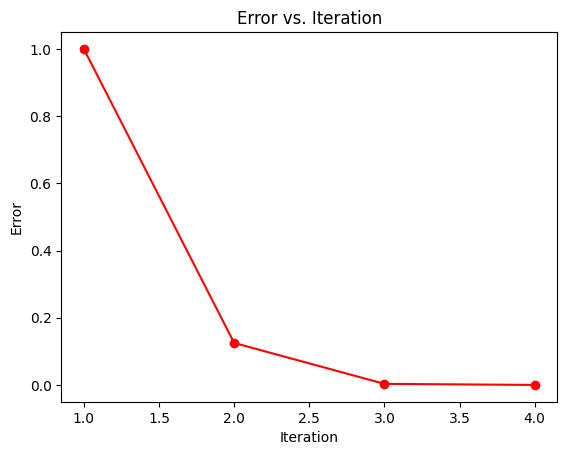

In [198]:
plt.plot(np.arange(0,iter+1), error, color="red", marker="o", )
plt.title('Error vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

## Running Algorithm - LU Decomposition

In [199]:
A_copy = A.copy()
b_copy = b.copy()
P, L, U = scipy.linalg.lu(A_copy)

print(f'P:\n{P}')
print(f'\nL:\n{L}')
print(f'\nU:\n{U}')

P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

L:
[[ 1.          0.          0.        ]
 [ 0.03333333  1.          0.        ]
 [ 0.1        -0.02712994  1.        ]]

U:
[[ 3.         -0.1        -0.2       ]
 [ 0.          7.00333333 -0.29333333]
 [ 0.          0.         10.01204188]]


$$
A = L \cdot U
$$
$$
Ax = b \Rightarrow L \cdot U \cdot x = b
$$

$$
U\cdot x = z \Rightarrow L \cdot z = b \Rightarrow z = L^{-1} \cdot b \Rightarrow x = U^{-1} \cdot L^{-1} \cdot b
$$

In [201]:
z = np.linalg.solve(L, b_copy)
print(f'z:\n{z}')

x_opt = np.linalg.solve(U, z)

print(f'Optimal solution:\n{x_opt}')

z:
[  7.85       -19.56166667  70.08429319]
Optimal solution:
[ 3.  -2.5  7. ]
